In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="whitegrid",context="notebook")

In [3]:
df = pd.read_csv("/home/ijaju/Documents/datasets/ckd.csv")
df = df.iloc[:,2:]

In [4]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

### Visualizing the important characteristics of the dataset
by plotting and finding the correlation

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


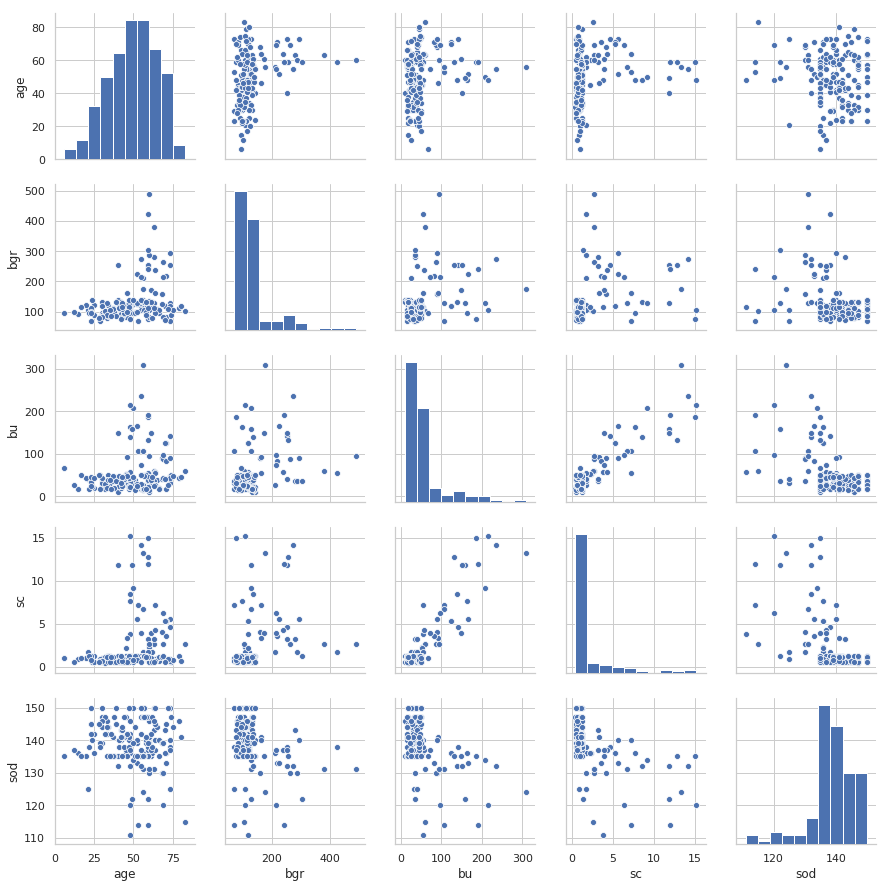

In [5]:
cols = ['age','bgr','bu','sc', 'sod']
sb.pairplot(df[cols],size=2.5)

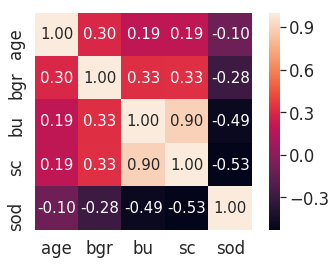

In [6]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sb.set(font_scale=1.5)
hm = sb.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()

### Gradient Descent

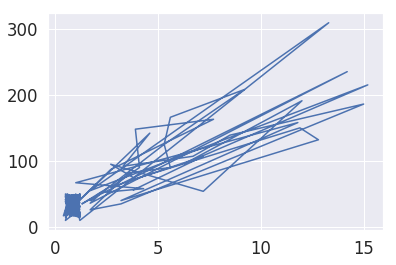

In [36]:
X = df[['sc']].values
y = df['bu'].values

plt.plot(X,y)
plt.show()

In [52]:
def compute_cost_function(m, t0, t1, x, y):
    return 1/2/m * sum([(t0 + t1* np.asarray([x[i]]) - y[i])**2 for i in range(m)])

def gradient_descent(alpha, x, y, ep=0.0001, max_iter=1500):
    converged = False
    iter = 0
    m = x.shape[0]
    print("iterations=",max_iter)

    t0 = 0
    t1 = 0

    J = compute_cost_function(m, t0, t1, x, y)

    while not converged:
        grad0 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i])*np.asarray([x[i]]) for i in range(m)])

        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1

        t0 = temp0
        t1 = temp1

        e = compute_cost_function(m, t0, t1, x, y)
        J = e 
        iter += 1
    
        if iter == max_iter:
            converged = True
            break

    return t0,t1

iterations= 1500
theta0 = [14.93262201] theta1 = [15.0012666]
slope= 15.001266603540925 intercept= 20.933128650320924


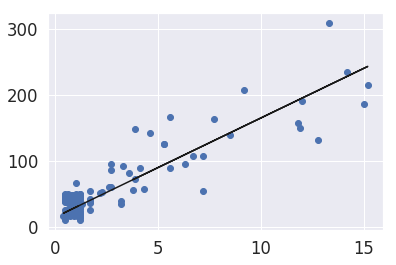

In [99]:
alpha = 0.001
ep = 0.01

theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1500)
print ('theta0 = ' + str(theta0)+' theta1 = '+str(theta1))

for i in range(x.shape[0]):
    y_predict = theta0 + theta1*x 

slope = (y_predict[0]-y_predict[116])/(x[0]-x[116])
intercept=y_predict[116]
print("slope=",slope,"intercept=",intercept)

plt.plot(X,y,'o')
plt.plot(X,y_predict,'k-')
plt.show()

### Via sklearn

In [43]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

In [39]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])

print('Intercept: %.3f' % slr.intercept_)

Slope: 13.800
Intercept: 22.373


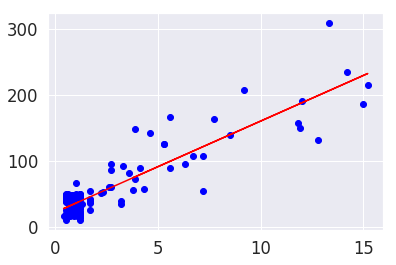

In [45]:
lin_regplot(X, y, slr)
plt.show()

### Using RANSAC

In [48]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                        max_trials=100,
                        min_samples=50,
                        residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                        residual_threshold=5.0,
                        random_state=0)
ransac.fit(X, y)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x7f20e6567488>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

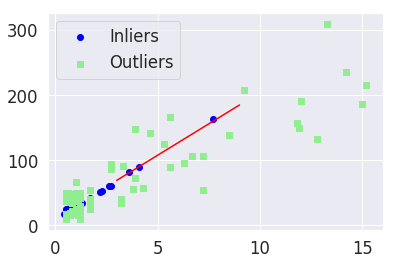

In [50]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.legend(loc='upper left')
plt.show()

In [51]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])

print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 19.272
Intercept: 11.483
